# Types of Naive Bayes algorithm
- Gaussian Naïve Bayes: Good for making predictions from normally distributed features
- Multinomial Naïve Bayes: Good when your features (categorical or continous) describe discrete frequency counts (e.g word counts)
- Bernoulli Naïve Bayes: Good for making predictions from binary features

## DataSet source

https://www.kaggle.com/competitions/fake-news/overview

# Imports and file

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the TEST dataset
file_path = r'C:\Users\Nicole\Desktop\Upwork\MachineLearning_Class\test_multinomial.csv'
df_test = pd.read_csv(file_path)

# Load the TRAIN dataset
file_path = r'C:\Users\Nicole\Desktop\Upwork\MachineLearning_Class\train_multinomial.csv'
df_train = pd.read_csv(file_path)


# Take a look to the file

- id: unique id for a news article
- title: the title of a news article
- author: author of the news article
- text: the text of the article; could be incomplete
- label: a label that marks the article as potentially unreliable
    - 1: unreliable
    - 0: reliable

In [120]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [121]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Bearing in mind that this "test" file has no labels, as it would be a competition file
we'll use the df_train file as if it were all our data, and we'll separate it again into training and test.

# Data analysis

Taking a look to the "df.head()" we can see we have NaN values, so now we have to do same work on this data. Cleaning and processing.

In [122]:
print(len(df_train))

20800


In [123]:
# Checking the number of nulls in each column
null_counts = df_train[['title', 'author', 'text', 'label']].isnull().sum()
print(null_counts)

title      558
author    1957
text        39
label        0
dtype: int64


In [124]:
# replacing the null values with empty string
df_train = df_train.fillna('')

In [125]:
# Checking the number of nulls in each column
null_counts = df_train[['title', 'author', 'text', 'label']].isnull().sum()
print(null_counts)

title     0
author    0
text      0
label     0
dtype: int64


## Sppliting

In [126]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'], test_size=0.2, random_state=10)

## Vectorize

In [127]:
# Vetorizar os dados de texto
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Treinar o modelo Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)


MultinomialNB()

### Creating a confusion matrix function

In [128]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Performing the model prediction and plotting the accuracy and confusion matrix

Confusion matrix, without normalization
Model Accuracy: 0.8983173076923077


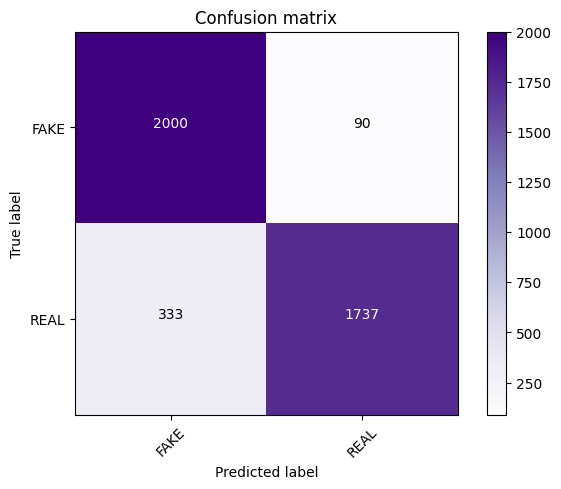

In [129]:
from sklearn import metrics
import itertools
import numpy as np

# Make predictions on the test set
predictions = clf.predict(X_test_counts)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print confusion matrix
cm1 = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

# Print accuracy
print("Model Accuracy:", accuracy)

# Trying with stemming

In [130]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

port_stem = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nicole\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
# merging the author name and news title
df_train['content'] = df_train['author']+' '+df_train['title']

In [132]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [133]:
df_train['content'] = df_train['content'].apply(stemming)

In [134]:
#separating the data and label
X = df_train['content'].values
Y = df_train['label'].values

In [135]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
